In [1]:
import torch
import matplotlib.pyplot as plt
from torchzero.optim import SwarmOfOptimizers, RandomGrad
from image_descent import ImageDescent

image = r"F:\Stuff\Programming\AI\pytorch image descent\surfaces\spiral.jpg"

# Swarm of optimizers
Swarm of optimizers means we use multiple optimizers, each one has its own copy of model parameters. With default arguments nothing really happens, each just optimizes their own parameters, in fact most gradient-based optimizers will generate exactly the same updates. If we want them to diverge, we have to add a tiny bit of random noise to the updates. 

We can add all kinds of things to a swarm, such as gravity, where all optimizers will gravitate towards the best; mean momentum based on mean of all optimizers; using genetic crossover to replace parameters in old optimizers that are behind.

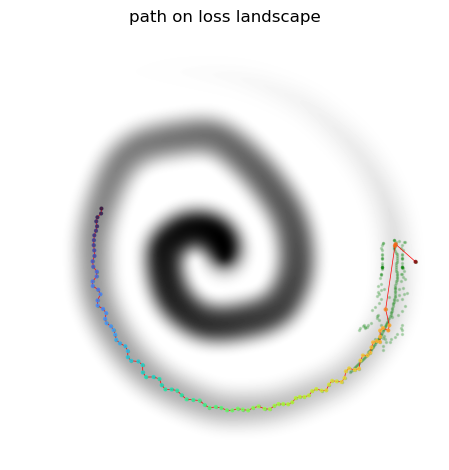

In [2]:
descent = ImageDescent(image, coords=(915, 500))

optimizers = [torch.optim.Adam(descent.parameters(), lr=1e-1), torch.optim.SGD(descent.parameters(), lr=4e-1),  torch.optim.Adam(descent.parameters(), lr=1e-2), ]
swarm = SwarmOfOptimizers(descent.parameters(), optimizers)
for i in range(100):
    print(i, end='\r')
    swarm.zero_grad()
    swarm.step(descent.step_search)
    descent.step_nograd()
descent.plot_path()

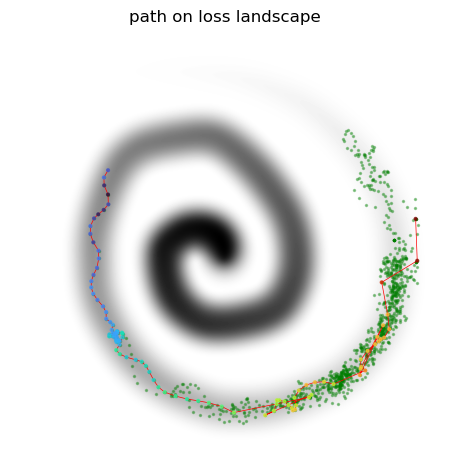

In [7]:
descent = ImageDescent(image, coords=(915, 500))

optimizers = [RandomGrad(descent.parameters(), opt = torch.optim.Adam(descent.parameters(), lr=1e-1)) for _ in range(10)]
swarm = SwarmOfOptimizers(descent.parameters(), optimizers)
for i in range(100):
    print(i, end='\r')
    swarm.zero_grad()
    swarm.step(descent.step_search)
    descent.step_nograd()
descent.plot_path()

After `old_steps` steps, an optimizer is considered old. If an old optimizer doesn't become the best at least once for `old_steps` consecutive steps, it dies.

When an optimizer dies, the parameters it was optimizing get replaced with a crossover of two best optimizer parameters. Crossover doesn't really help with descending a spiral, so the demonstrated effect is just from bad optimizers dying off and inheriting good parameters.

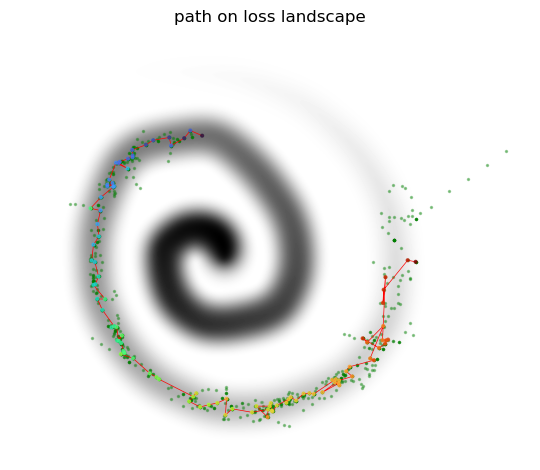

In [23]:
descent = ImageDescent(image, coords=(915, 500))

optimizers = [RandomGrad(descent.parameters(), opt = torch.optim.Adam(descent.parameters(), lr=1e-1)) for _ in range(10)]
swarm = SwarmOfOptimizers(descent.parameters(), optimizers, die_after=3, old_steps=3)
for i in range(100):
    print(i, end='\r')
    swarm.zero_grad()
    swarm.step(descent.step_nograd_search)
    descent.step_nograd()
descent.plot_path()